# Housing: Price Prediction

## Data Description

To build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not.

Import required libraries

In [166]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

## Loading the dataset

In [167]:
dtest=pd.read_csv(r"C:\Users\jothu\Downloads\Project-Housing\Project-Housing_splitted\test.csv")

In [168]:
dtrain=pd.read_csv(r"C:\Users\jothu\Downloads\Project-Housing\Project-Housing_splitted\train.csv")

In [169]:
dtest=pd.DataFrame(dtest)

In [170]:
dtest

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
5     650         180       RM         21.0     1936   Pave   NaN      Reg   
6    1453         180       RM         35.0     3675   Pave   NaN      Reg   
7     152          20       RL        107.0    13891   Pave   NaN      Reg   
8     427          80       RL          NaN    12800   Pave   NaN      Reg   
9     776         120       RM         32.0     4500   Pave   NaN      Reg   
10     30          30       RM         60.0     6324   Pave   NaN      IR1   
11   1425          20       RL          NaN     9503   Pave   NaN      Reg   
12    423          20       RL        100.0    21750   Pave   NaN      Reg   
13   1185          20       RL         50.0    35133   Grvl   NaN      Reg   
14    775          20       RL        110.0    14226   Pave   NaN      Reg   
15    391          50       RL         50.0     8405   Pave  Grvl      Reg   
16   1408          20       RL          NaN     8780   Pave   NaN      IR1   
17    513          20       RL         70.0     9100   Pave   NaN      Reg   
18   1266         160       FV         35.0     3735   Pave   NaN      Reg   
19    173         160       RL         44.0     5306   Pave   NaN      IR1   
20   1150          70       RM         50.0     9000   Pave   NaN      Reg   
21    797          20       RL         71.0     8197   Pave   NaN      Reg   
22    137          20       RL          NaN    10355   Pave   NaN      IR1   
23    706         190       RM         70.0     5600   Pave   NaN      Reg   
24   1377          30       RL         52.0     6292   Pave   NaN      Reg   
25   1177          20       RL         37.0     6951   Pave   NaN      IR1   
26   1456          60       RL         62.0     7917   Pave   NaN      Reg   
27    369          20       RL         78.0     7800   Pave   NaN      Reg   
28   1421          60       RL         90.0    11700   Pave   NaN      Reg   
29    999          30       RM         60.0     9786   Pave   NaN      Reg   
30   1217          90       RM         68.0     8930   Pave   NaN      Reg   
31    937          20       RL         67.0    10083   Pave   NaN      Reg   
32    769          20       RL         70.0     9100   Pave   NaN      Reg   
33    831          20       RL         80.0    11900   Pave   NaN      IR1   
34    678          30       RL         52.0     9022   Pave   NaN      Reg   
35    574          80       RL         76.0     9967   Pave   NaN      IR1   
36    921          60       RL         70.0     8462   Pave   NaN      IR1   
37   1292         160       RM         21.0     1680   Pave   NaN      Reg   
38   1277          60       RL          NaN    12936   Pave   NaN      IR1   
39    676         160       RL         24.0     2289   Pave   NaN      Reg   
40    108          20       RM         50.0     6000   Pave   NaN      Reg   
41    424          60       RL         80.0     9200   Pave   NaN      Reg   
42    823          60       RL          NaN    12394   Pave   NaN      IR1   
43   1455          20       FV         62.0     7500   Pave  Pave      Reg   
44    377          85       RL         57.0     8846   Pave   NaN      IR1   
45   1256          50       RM         52.0     6240   Pave   NaN      Reg   
46   1120          20       RL         70.0     7560   Pave   NaN      Reg   
47    265          30       RM         30.0     5232   Pave  Grvl      IR3   
48   1158         120       RL         34.0     5001   Pave   NaN      IR1   
49    725          20       RL         86.0    13286   Pave   NaN      IR1   
50   1378          50       R

In [171]:
dtrain=pd.DataFrame(dtrain)

In [172]:
dtrain

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL          NaN     4928   Pave   NaN      IR1   
1      889          20       RL         95.0    15865   Pave   NaN      IR1   
2      793          60       RL         92.0     9920   Pave   NaN      IR1   
3      110          20       RL        105.0    11751   Pave   NaN      IR1   
4      422          20       RL          NaN    16635   Pave   NaN      IR1   
5     1197          60       RL         58.0    14054   Pave   NaN      IR1   
6      561          20       RL          NaN    11341   Pave   NaN      IR1   
7     1041          20       RL         88.0    13125   Pave   NaN      Reg   
8      503          20       RL         70.0     9170   Pave   NaN      Reg   
9      576          50       RL         80.0     8480   Pave   NaN      Reg   
10     449          50       RM         50.0     8600   Pave   NaN      Reg   
11     833          60       RL         44.0     9548   Pave   NaN      IR1   
12     277          20       RL        129.0     9196   Pave   NaN      IR1   
13      84          20       RL         80.0     8892   Pave   NaN      IR1   
14     888          50       RL         59.0    16466   Pave   NaN      IR1   
15    1013          70       RL         55.0    10592   Pave   NaN      Reg   
16    1154          30       RM          NaN     5890   Pave   NaN      Reg   
17     728          20       RL         64.0     7314   Pave   NaN      Reg   
18     270          20       RL          NaN     7917   Pave   NaN      IR1   
19    1105         160       RM         24.0     2016   Pave   NaN      Reg   
20     259          60       RL         80.0    12435   Pave   NaN      Reg   
21    1407          85       RL         70.0     8445   Pave   NaN      Reg   
22    1459          20       RL         68.0     9717   Pave   NaN      Reg   
23     997          20       RL          NaN    10659   Pave   NaN      IR1   
24    1094          20       RL         71.0     9230   Pave   NaN      Reg   
25     114          20       RL          NaN    21000   Pave   NaN      Reg   
26    1384          30       RL          NaN    25339   Pave   NaN      Reg   
27     379          20       RL         88.0    11394   Pave   NaN      Reg   
28     556          45       RM         58.0     6380   Pave   NaN      Reg   
29     464          70       RL         74.0    11988   Pave   NaN      IR1   
30      46         120       RL         61.0     7658   Pave   NaN      Reg   
31     426          60       RM         60.0     3378   Pave  Grvl      Reg   
32    1231          90       RL          NaN    18890   Pave   NaN      IR1   
33     171          50       RM          NaN    12358   Pave   NaN      IR1   
34     869          60       RL          NaN    14762   Pave   NaN      IR2   
35     151          20       RL        120.0    10356   Pave   NaN      Reg   
36     859          20       RL         80.0    10400   Pave   NaN      Reg   
37     176          20       RL         84.0    12615   Pave   NaN      Reg   
38     361          85       RL          NaN     7540   Pave   NaN      IR1   
39     590          40       RM         50.0     9100   Pave   NaN      Reg   
40     172          20       RL        141.0    31770   Pave   NaN      IR1   
41     527          20       RL         70.0    13300   Pave   NaN      Reg   
42    1365         160       FV         30.0     3180   Pave  Pave      Reg   
43     146         160       RM         24.0     2522   Pave   NaN      Reg   
44    1006          80       RL         65.0     8385   Pave   NaN      Reg   
45     275          20       RL         76.0     8314   Pave   NaN      Reg   
46     380          60       RL         60.0     8123   Pave   NaN      IR1   
47    1309          20       RM        100.0    12000   Pave   NaN      Reg   
48     534          20       RL         50.0     5000   Pave   NaN      Reg   
49     494          20       RL         70.0     7931   Pa

In [8]:
dtrain.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [9]:
# To display the maximum number of rows

In [10]:
pd.set_option('display.max_rows',None)

## Exploratory Data Analysis

In [11]:
dtrain.shape

(1168, 81)

In [12]:
dtrain.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


There are integer,object as well as float data

In [13]:
dtest.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


The test data also has integer, object and float values

In [14]:
dtrain.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

There are many null values in few columns

In [15]:
dtest.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In test dataset also there are many null values

## Using LabelEncoder for data type conversion 

In [16]:
# Extracting all object data

In [173]:
cat_dtrain = dtrain.select_dtypes(include=['object']).dtypes.index

In [174]:
cat_dtrain

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [175]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for val in cat_dtrain:
    dtrain[val]=le.fit_transform(dtrain[val].astype(str))

In [176]:
dtrain

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0      127         120         3          NaN     4928       1      2   
1      889          20         3         95.0    15865       1      2   
2      793          60         3         92.0     9920       1      2   
3      110          20         3        105.0    11751       1      2   
4      422          20         3          NaN    16635       1      2   
5     1197          60         3         58.0    14054       1      2   
6      561          20         3          NaN    11341       1      2   
7     1041          20         3         88.0    13125       1      2   
8      503          20         3         70.0     9170       1      2   
9      576          50         3         80.0     8480       1      2   
10     449          50         4         50.0     8600       1      2   
11     833          60         3         44.0     9548       1      2   
12     277          20         3        129.0     9196       1      2   
13      84          20         3         80.0     8892       1      2   
14     888          50         3         59.0    16466       1      2   
15    1013          70         3         55.0    10592       1      2   
16    1154          30         4          NaN     5890       1      2   
17     728          20         3         64.0     7314       1      2   
18     270          20         3          NaN     7917       1      2   
19    1105         160         4         24.0     2016       1      2   
20     259          60         3         80.0    12435       1      2   
21    1407          85         3         70.0     8445       1      2   
22    1459          20         3         68.0     9717       1      2   
23     997          20         3          NaN    10659       1      2   
24    1094          20         3         71.0     9230       1      2   
25     114          20         3          NaN    21000       1      2   
26    1384          30         3          NaN    25339       1      2   
27     379          20         3         88.0    11394       1      2   
28     556          45         4         58.0     6380       1      2   
29     464          70         3         74.0    11988       1      2   
30      46         120         3         61.0     7658       1      2   
31     426          60         4         60.0     3378       1      0   
32    1231          90         3          NaN    18890       1      2   
33     171          50         4          NaN    12358       1      2   
34     869          60         3          NaN    14762       1      2   
35     151          20         3        120.0    10356       1      2   
36     859          20         3         80.0    10400       1      2   
37     176          20         3         84.0    12615       1      2   
38     361          85         3          NaN     7540       1      2   
39     590          40         4         50.0     9100       1      2   
40     172          20         3        141.0    31770       1      2   
41     527          20         3         70.0    13300       1      2   
42    1365         160         1         30.0     3180       1      1   
43     146         160         4         24.0     2522       1      2   
44    1006          80         3         65.0     8385       1      2   
45     275          20         3         76.0     8314       1      2   
46     380          60         3         60.0     8123       1      2   
47    1309          20         4        100.0    12000       1      2   
48     534          20         3         50.0     5000       1      2   
49     494          20         3         70.0     7931       1      2   
50     701          20         3         85.0    14331       1      2   
51    1329          50         4         60.0    10440       1      0   
52    1101          30         3         60.0     8400       1      2   
53     902          20         3         64.0     8712       1    

In [177]:
dtrain.shape

(1168, 81)

In [22]:
# Extracting all object data from test set

In [178]:
cat_dtest=dtest.select_dtypes(include=['object']).dtypes.index

In [179]:
cat_dtest

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [180]:
for val in cat_dtest:
    dtest[val]=le.fit_transform(dtest[val].astype(str))

In [26]:
dtest

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     337          20         2         86.0    14157       1      2   
1    1018         120         2          NaN     5814       1      2   
2     929          20         2          NaN    11838       1      2   
3    1148          70         2         75.0    12000       1      2   
4    1227          60         2         86.0    14598       1      2   
5     650         180         3         21.0     1936       1      2   
6    1453         180         3         35.0     3675       1      2   
7     152          20         2        107.0    13891       1      2   
8     427          80         2          NaN    12800       1      2   
9     776         120         3         32.0     4500       1      2   
10     30          30         3         60.0     6324       1      2   
11   1425          20         2          NaN     9503       1      2   
12    423          20         2        100.0    21750       1      2   
13   1185          20         2         50.0    35133       0      2   
14    775          20         2        110.0    14226       1      2   
15    391          50         2         50.0     8405       1      0   
16   1408          20         2          NaN     8780       1      2   
17    513          20         2         70.0     9100       1      2   
18   1266         160         1         35.0     3735       1      2   
19    173         160         2         44.0     5306       1      2   
20   1150          70         3         50.0     9000       1      2   
21    797          20         2         71.0     8197       1      2   
22    137          20         2          NaN    10355       1      2   
23    706         190         3         70.0     5600       1      2   
24   1377          30         2         52.0     6292       1      2   
25   1177          20         2         37.0     6951       1      2   
26   1456          60         2         62.0     7917       1      2   
27    369          20         2         78.0     7800       1      2   
28   1421          60         2         90.0    11700       1      2   
29    999          30         3         60.0     9786       1      2   
30   1217          90         3         68.0     8930       1      2   
31    937          20         2         67.0    10083       1      2   
32    769          20         2         70.0     9100       1      2   
33    831          20         2         80.0    11900       1      2   
34    678          30         2         52.0     9022       1      2   
35    574          80         2         76.0     9967       1      2   
36    921          60         2         70.0     8462       1      2   
37   1292         160         3         21.0     1680       1      2   
38   1277          60         2          NaN    12936       1      2   
39    676         160         2         24.0     2289       1      2   
40    108          20         3         50.0     6000       1      2   
41    424          60         2         80.0     9200       1      2   
42    823          60         2          NaN    12394       1      2   
43   1455          20         1         62.0     7500       1      1   
44    377          85         2         57.0     8846       1      2   
45   1256          50         3         52.0     6240       1      2   
46   1120          20         2         70.0     7560       1      2   
47    265          30         3         30.0     5232       1      0   
48   1158         120         2         34.0     5001       1      2   
49    725          20         2         86.0    13286       1      2   
50   1378          50         2         60.0    10998       1      0   
51   1139          20         2          NaN     9819       1      2   
52    122          50         3         50.0     6060       1      2   
53    515          45         2         55.0    10594       1      2   
54    518          60         2         79.0   

## Replacing Nan Values

In [181]:
dtrain_new=dtrain.replace(np.NaN,dtrain.median())

In [28]:
dtrain_new.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [29]:
# We have replaced all the null values with median

In [182]:
dtest_new=dtest.replace(np.NaN,dtest.median())

In [31]:
dtest_new.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [32]:
# In test dataset PoolQC only has NaN values.

In [183]:
dtest_new['PoolQC']=dtest_new['PoolQC'].replace(np.NaN,'0') # Replacing all the NaN values with 0 

In [184]:
dtest_new.tail()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
287    83          20         2         78.0    10206       1      2   
288  1048          20         2         57.0     9245       1      2   
289    17          20         2         65.0    11241       1      2   
290   523          50         3         50.0     5000       1      2   
291  1379         160         3         21.0     1953       1      2   

     LotShape  LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  \
287         3            3          0  ...            0         0       0   
288         1            3          0  ...            0         0       0   
289         0            3          0  ...            0         0       0   
290         3            3          0  ...            0         0       0   
291         3            3          0  ...            0         0       0   

     Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
287      4            2        0      10    2008         5              2  
288      4            2        0       2    2008         5              2  
289      4            1      700       3    2010         5              2  
290      4            2        0      10    2006         5              2  
291      4            2        0       6    2006         5              2  

[5 rows x 80 columns]

In [ ]:
# We have replaced all the NaN values with integer 0 

In [35]:
dtrain_new.describe(include='all')

Id   MSSubClass     MSZoning  LotFrontage        LotArea  \
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000   
mean    724.136130    56.767979     3.013699    70.807363   10484.749144   
std     416.159877    41.940650     0.633120    22.440317    8957.442311   
min       1.000000    20.000000     0.000000    21.000000    1300.000000   
25%     360.500000    20.000000     3.000000    60.000000    7621.500000   
50%     714.500000    50.000000     3.000000    70.000000    9522.500000   
75%    1079.500000    70.000000     3.000000    79.250000   11515.500000   
max    1460.000000   190.000000     4.000000   313.000000  164660.000000   

            Street        Alley     LotShape  LandContour  Utilities  ...  \
count  1168.000000  1168.000000  1168.000000  1168.000000     1168.0  ...   
mean      0.996575     1.898973     1.938356     2.773973        0.0  ...   
std       0.058445     0.401453     1.412262     0.710027        0.0  ...   
min       0.000000     0.000000     0.000000     0.000000        0.0  ...   
25%       1.000000     2.000000     0.000000     3.000000        0.0  ...   
50%       1.000000     2.000000     3.000000     3.000000        0.0  ...   
75%       1.000000     2.000000     3.000000     3.000000        0.0  ...   
max       1.000000     2.000000     3.000000     3.000000        0.0  ...   

          PoolArea       PoolQC        Fence  MiscFeature       MiscVal  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean      3.448630     2.988870     3.475171     3.921233     47.315068   
std      44.896939     0.157245     1.112090     0.408514    543.264432   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     3.000000     4.000000     4.000000      0.000000   
50%       0.000000     3.000000     4.000000     4.000000      0.000000   
75%       0.000000     3.000000     4.000000     4.000000      0.000000   
max     738.000000     3.000000     4.000000     4.000000  15500.000000   

            MoSold       YrSold     SaleType  SaleCondition      SalePrice  
count  1168.000000  1168.000000  1168.000000    1168.000000    1168.000000  
mean      6.344178  2007.804795     7.465753       3.768836  181477.005993  
std       2.686352     1.329738     1.619459       1.112208   79105.586863  
min       1.000000  2006.000000     0.000000       0.000000   34900.000000  
25%       5.000000  2007.000000     8.000000       4.000000  130375.000000  
50%       6.000000  2008.000000     8.000000       4.000000  163995.000000  
75%       8.000000  2009.000000     8.000000       4.000000  215000.000000  
max      12.000000  2010.000000     8.000000       5.000000  755000.000000  

[8 rows x 81 columns]

There is a huge difference between standard deviation and mean in PoolArea,MiscVal so there are outliers and skewness

There is a huge difference between 75th percentile and maximum value in LotFrontage,LotArea,MiscVal.

There is huge difference of range in few columns such as MSSubClass,LotArea etc. so Scaling is required.

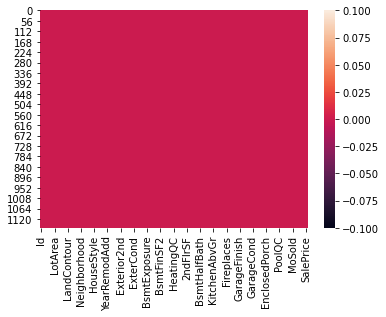

In [36]:
sns.heatmap(dtrain_new.isnull())

There are no null values

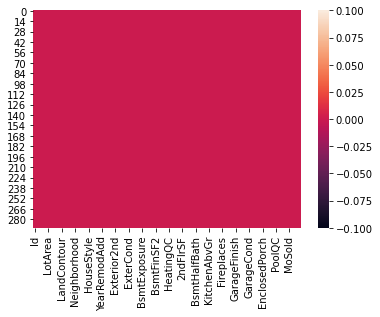

In [37]:
sns.heatmap(dtest_new.isnull())

There are no null values

In [38]:
dfcor=dtrain_new.corr()

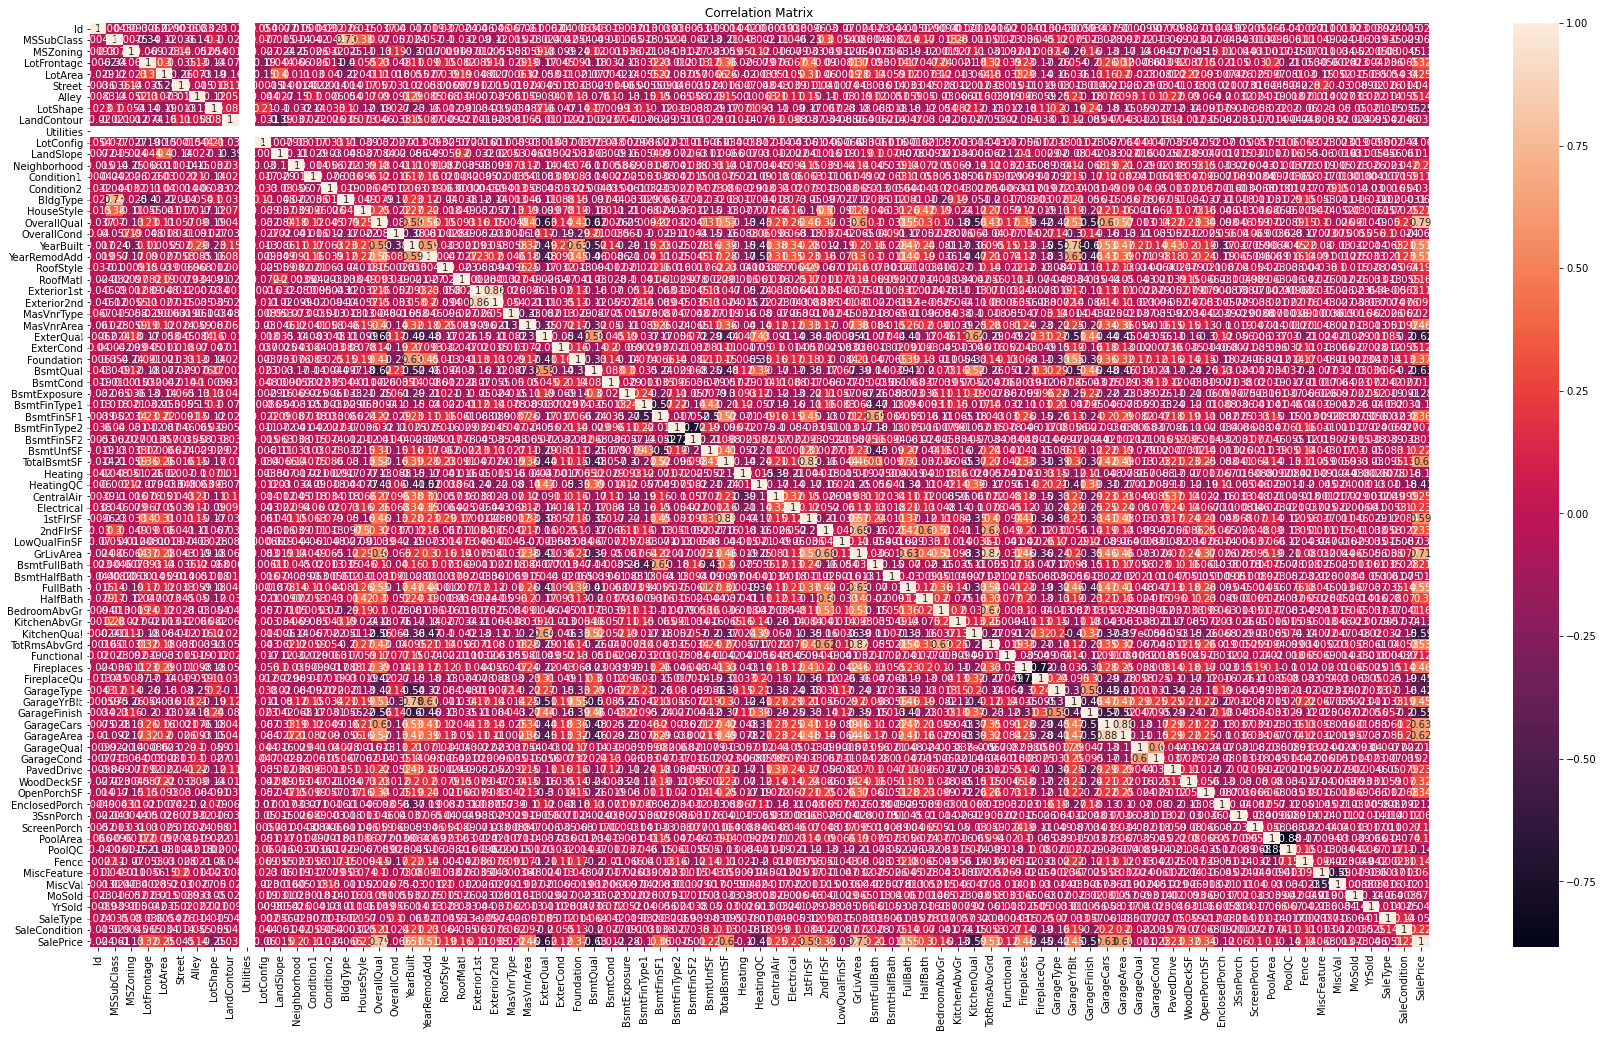

In [36]:
plt.figure(figsize=[30,17])
sns.heatmap(dfcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

The darker shade represents the negative correlation and lighter shades represents positive correlation.
Since there are many columns we cannot determine the relationship between each columns so we will plot it separately.

In [38]:
corr_matrix=dfcor.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.979182
GarageArea       0.942105
GarageCars       0.939342
GrLivArea        0.895744
FullBath         0.890601
TotalBsmtSF      0.890507
YearRemodAdd     0.864170
1stFlrSF         0.864070
MasVnrArea       0.862865
YearBuilt        0.829996
Fireplaces       0.821962
GarageYrBlt      0.805441
OpenPorchSF      0.787714
Foundation       0.773909
TotRmsAbvGrd     0.773864
WoodDeckSF       0.739202
LotFrontage      0.719014
Electrical       0.658095
BsmtFinSF1       0.628299
CentralAir       0.626946
PavedDrive       0.621070
HalfBath         0.616933
SaleCondition    0.599528
LotArea          0.523560
HouseStyle       0.523062
Neighborhood     0.512628
BsmtUnfSF        0.509892
2ndFlrSF         0.481821
RoofStyle        0.465258
BsmtFullBath     0.426076
Fence            0.423604
Alley            0.423002
Condition1       0.411441
ExterCond        0.406189
Exterior1st      0.345431
Functional       0.297803
Exterior2nd      0.296634
RoofMatl    

This shows the relation between target variable and all the column.

OverallQual has the highest relation with SalePrice  and BsmtQual has the lowest relation with SalePrice. 

Utilities has no relation at all it shows NaN values.

In [39]:
dtrain_new['Utilities']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [40]:
dtest_new['Utilities']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     1
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

Utilites column in both the data set has 0 values except for one row in test data.

Since it does not have good relation with target variable we can remove this column from both the dataset.

In [185]:
dtrain_new=dtrain_new.drop('Utilities',axis=1)

In [41]:
dtrain_new.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckS

In [186]:
dtest_new=dtest_new.drop('Utilities',axis=1)

In [43]:
dtest_new.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckS

In [45]:
dtrain_new['PoolQC'].unique()

array([3, 0, 2, 1])

In [46]:
dtest_new['PoolQC'].unique()

array(['0'], dtype=object)

It is observed that in train data the values in PoolQc has values from 0 to 3 but in test data all the values are 0.

In [63]:
dtrain_new['BsmtQual'].unique() 

array([2, 3, 0, 4, 1])

In [64]:
dtest_new['BsmtQual'].unique() 

array([0, 2, 3, 4, 1])

This column has same values for both the data set

In [70]:
import matplotlib.pyplot as plt

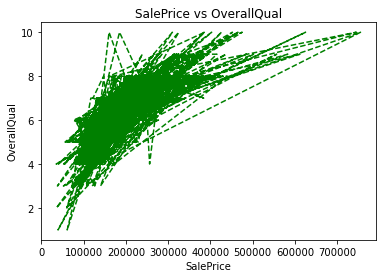

In [76]:
plt.title('SalePrice vs OverallQual')
plt.xlabel('SalePrice')
plt.ylabel('OverallQual')
plt.plot(dtrain_new['SalePrice'],dtrain_new['OverallQual'],'--g')
plt.show()

OverallQual rates the overall material and finishing of the house.

For 100000 the rates for finishing is only between 0 to 6 but for 200000 to 700000 OverallQual varies from 4 to 10

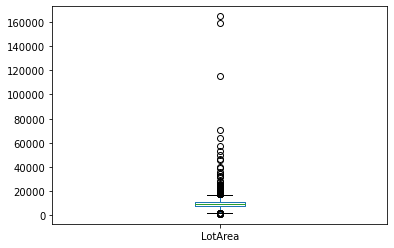

In [51]:
dtrain_new['LotArea'].plot.box()

All the houses have different square feet, most of them are in range under 80000.

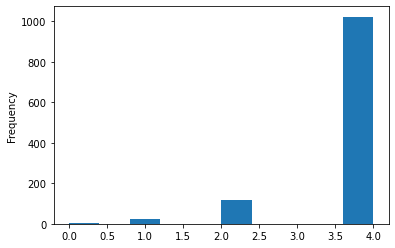

In [52]:
dtrain_new['ExterCond'].plot.hist()

ExterCond determines the condition of the material in exterior of the house.

Condition TA	Average/Typical has the highest frequency in this set.

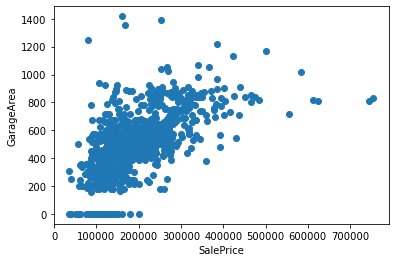

In [59]:
plt.scatter(dtrain_new['SalePrice'],dtrain_new['GarageArea'])
plt.xlabel('SalePrice')
plt.ylabel('GarageArea')
plt.show()

Garage area is the second most important variable which has the good relationship with the Sale Price.


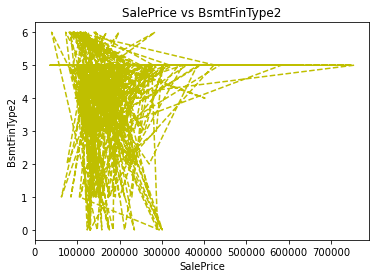

In [60]:
plt.title('SalePrice vs BsmtFinType2')
plt.xlabel('SalePrice')
plt.ylabel('BsmtFinType2')
plt.plot(dtrain_new['SalePrice'],dtrain_new['BsmtFinType2'],'--y')
plt.show()

Rating of basement finished area is negatively correlated with Sale Price.

In [ ]:
PCA

## Checking Outliers

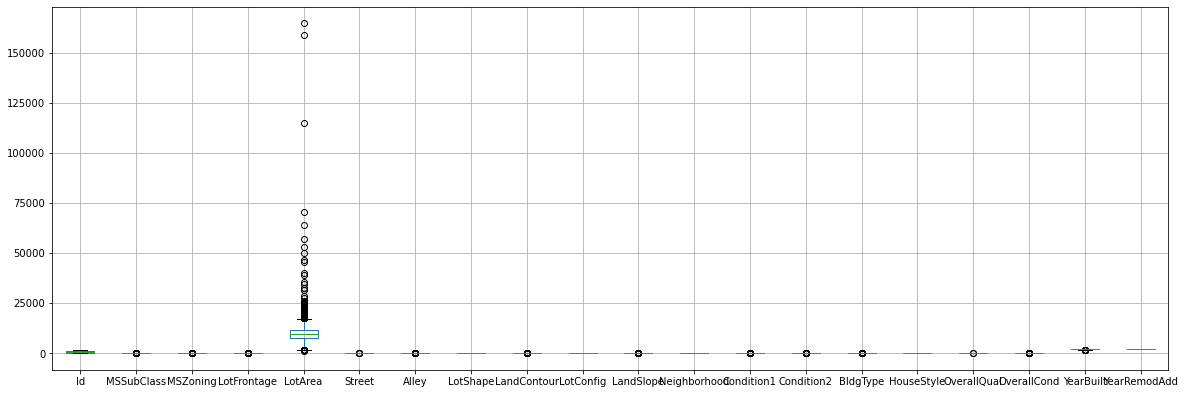

In [61]:
dtrain_new.iloc[:,0:20].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

LotArea has some outliers

In [62]:
dtrain_new.iloc[:,20:40].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

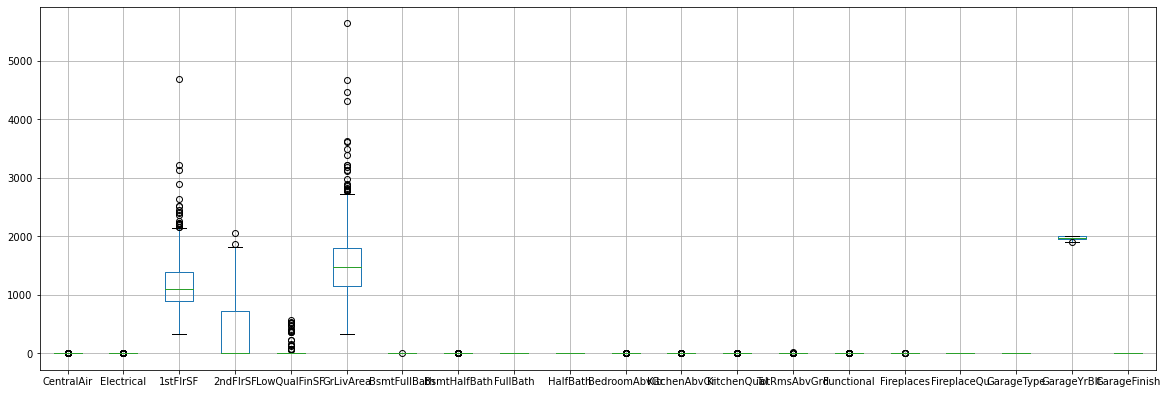

In [63]:
dtrain_new.iloc[:,40:60].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

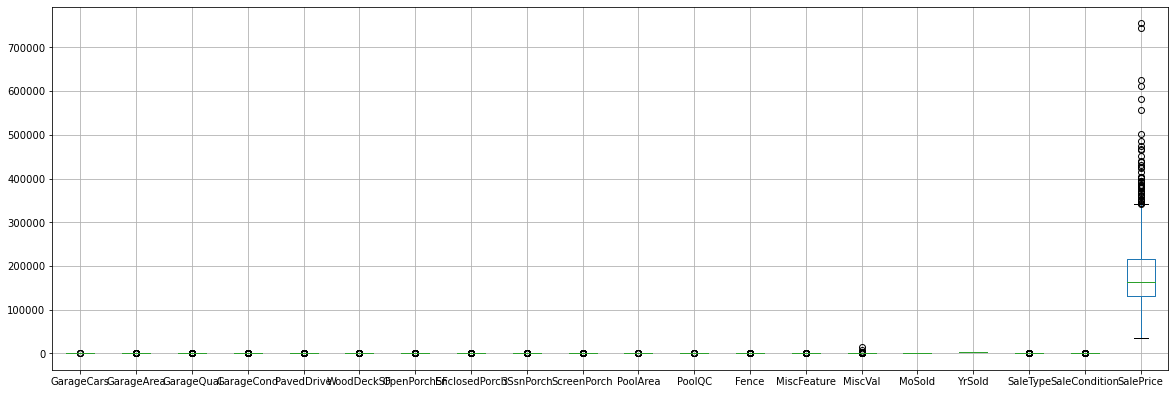

In [64]:
dtrain_new.iloc[:,60:80].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

There are outliers in many columns

## Removing outliers

In [187]:
from scipy.stats import zscore
z=np.abs(zscore(dtrain_new))
z

array([[1.43548658, 1.50830058, 0.02164599, ..., 0.33003329, 0.20793187,
        0.67631017],
       [0.39632483, 0.87704243, 0.02164599, ..., 0.33003329, 0.20793187,
        1.09423443],
       [0.16554544, 0.07709478, 0.02164599, ..., 0.33003329, 0.20793187,
        1.11687211],
       ...,
       [1.26961389, 2.46243779, 0.02164599, ..., 0.33003329, 0.20793187,
        0.41705186],
       [1.66626597, 0.31562908, 4.76211672, ..., 0.33003329, 0.20793187,
        1.78922393],
       [0.25755011, 0.07709478, 0.02164599, ..., 0.33003329, 0.20793187,
        0.02179027]])

In [188]:
threshold=3
print(np.where(z>3))

(array([   1,    1,    1, ..., 1166, 1166, 1166], dtype=int64), array([10, 21, 35, ..., 40, 63, 64], dtype=int64))


In [189]:
z[1][10]

3.295414143816642

In [190]:
z[1166][64]

3.694781346620184

In [191]:
dtrain_new.shape

(1168, 80)

In [192]:
df_train = pd.DataFrame(z, columns=dtrain_new.columns)
df_train

Id  MSSubClass  MSZoning  LotFrontage    LotArea     Street  \
0     1.435487    1.508301  0.021646     0.035994   0.620616   0.058621   
1     0.396325    0.877042  0.021646     1.078550   0.600903   0.058621   
2     0.165545    0.077095  0.021646     0.944805   0.063075   0.058621   
3     1.476354    0.877042  0.021646     1.524367   0.141424   0.058621   
4     0.726321    0.877042  0.021646     0.035994   0.686902   0.058621   
5     1.136742    0.077095  0.021646     0.570975   0.398638   0.058621   
6     0.392171    0.877042  0.021646     0.035994   0.095632   0.058621   
7     0.761726    0.877042  0.021646     0.766478   0.294881   0.058621   
8     0.531601    0.877042  0.021646     0.035994   0.146840   0.058621   
9     0.356112    0.161440  0.021646     0.409824   0.223904   0.058621   
10    0.661414    0.161440  1.558511     0.927628   0.210502   0.058621   
11    0.261704    0.077095  0.021646     1.195119   0.104623   0.058621   
12    1.074894    0.877042  0.021646     2.594329   0.143936   0.058621   
13    1.538857    0.877042  0.021646     0.409824   0.177889   0.058621   
14    0.393921    0.161440  0.021646     0.526393   0.668027   0.058621   
15    0.694415    0.315629  0.021646     0.704720   0.011979   0.058621   
16    1.033372    0.638508  1.558511     0.035994   0.513173   0.058621   
17    0.009289    0.877042  0.021646     0.303484   0.354131   0.058621   
18    1.091721    0.877042  0.021646     0.035994   0.286784   0.058621   
19    0.915578    2.462438  1.558511     2.086754   0.945848   0.058621   
20    1.118165    0.077095  0.021646     0.409824   0.217817   0.058621   
21    1.641572    0.673431  0.021646     0.035994   0.227813   0.058621   
22    1.766577    0.877042  0.021646     0.125157   0.085747   0.058621   
23    0.655952    0.877042  0.021646     0.035994   0.019462   0.058621   
24    0.889135    0.877042  0.021646     0.008588   0.140139   0.058621   
25    1.466738    0.877042  0.021646     0.035994   1.174415   0.058621   
26    1.586281    0.638508  0.021646     0.035994   1.659024   0.058621   
27    0.829691    0.877042  0.021646     0.766478   0.101551   0.058621   
28    0.404191    0.280707  1.558511     0.570975   0.458446   0.058621   
29    0.625355    0.315629  0.021646     0.142333   0.167893   0.058621   
30    1.630207    1.508301  0.021646     0.437229   0.315711   0.058621   
31    0.716705    0.077095  1.558511     0.481811   0.793730   0.058621   
32    1.218476    0.792698  0.021646     0.035994   0.938756   0.058621   
33    1.329713    0.161440  1.558511     0.035994   0.209217   0.058621   
34    0.348246    0.077095  0.021646     0.035994   0.477713   0.058621   
35    1.377792    0.877042  0.021646     2.193093   0.014380   0.058621   
36    0.324206    0.877042  0.021646     0.409824   0.009465   0.058621   
37    1.317693    0.877042  0.021646     0.588151   0.237921   0.058621   
38    0.872962    0.673431  0.021646     0.035994   0.328890   0.058621   
39    0.322457    0.399974  1.558511     0.927628   0.154658   0.058621   
40    1.327309    0.877042  0.021646     3.129310   2.377282   0.058621   
41    0.473906    0.877042  0.021646     0.035994   0.314426   0.058621   
42    1.540606    2.462438  3.181960     1.819263   0.815844   0.058621   
43    1.389811    2.462438  1.558511     2.086754   0.889334   0.058621   
44    0.677587    0.554163  0.021646     0.258902   0.234514   0.058621   
45    1.079702    0.877042  0.021646     0.231497   0.242444   0.058621   
46    0.827287    0.077095  0.021646     0.481811   0.263776   0.058621   
47    1.405985    0.877042  1.558511     1.301459   0.169234   0.058621   
48    0.457078    0.877042  0.021646     0.927628   0.612574   0.058621   
49    0.553236    0.877042  0.021646     0.035994   0.285220   0.058621   
50    0.055618    0.877042  0.021646     0.632732   0.429576   0.058621   
51    1.454064    0.161440  1.558511     0.481811   0.004998   0.058621   
52    0.905963    0.638508  0.021646 

In [193]:
ddtest=dtest_new.astype(int) #Converted into integer format

In [194]:
ddtest

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     337          20         2           86    14157       1      2   
1    1018         120         2           65     5814       1      2   
2     929          20         2           65    11838       1      2   
3    1148          70         2           75    12000       1      2   
4    1227          60         2           86    14598       1      2   
5     650         180         3           21     1936       1      2   
6    1453         180         3           35     3675       1      2   
7     152          20         2          107    13891       1      2   
8     427          80         2           65    12800       1      2   
9     776         120         3           32     4500       1      2   
10     30          30         3           60     6324       1      2   
11   1425          20         2           65     9503       1      2   
12    423          20         2          100    21750       1      2   
13   1185          20         2           50    35133       0      2   
14    775          20         2          110    14226       1      2   
15    391          50         2           50     8405       1      0   
16   1408          20         2           65     8780       1      2   
17    513          20         2           70     9100       1      2   
18   1266         160         1           35     3735       1      2   
19    173         160         2           44     5306       1      2   
20   1150          70         3           50     9000       1      2   
21    797          20         2           71     8197       1      2   
22    137          20         2           65    10355       1      2   
23    706         190         3           70     5600       1      2   
24   1377          30         2           52     6292       1      2   
25   1177          20         2           37     6951       1      2   
26   1456          60         2           62     7917       1      2   
27    369          20         2           78     7800       1      2   
28   1421          60         2           90    11700       1      2   
29    999          30         3           60     9786       1      2   
30   1217          90         3           68     8930       1      2   
31    937          20         2           67    10083       1      2   
32    769          20         2           70     9100       1      2   
33    831          20         2           80    11900       1      2   
34    678          30         2           52     9022       1      2   
35    574          80         2           76     9967       1      2   
36    921          60         2           70     8462       1      2   
37   1292         160         3           21     1680       1      2   
38   1277          60         2           65    12936       1      2   
39    676         160         2           24     2289       1      2   
40    108          20         3           50     6000       1      2   
41    424          60         2           80     9200       1      2   
42    823          60         2           65    12394       1      2   
43   1455          20         1           62     7500       1      1   
44    377          85         2           57     8846       1      2   
45   1256          50         3           52     6240       1      2   
46   1120          20         2           70     7560       1      2   
47    265          30         3           30     5232       1      0   
48   1158         120         2           34     5001       1      2   
49    725          20         2           86    13286       1      2   
50   1378          50         2           60    10998       1      0   
51   1139          20         2           65     9819       1      2   
52    122          50         3           50     6060       1      2   
53    515          45         2           55    10594       1      2   
54    518          60         2           79   

In [195]:
z=np.abs(zscore(ddtest))
z

array([[0.94827766, 0.85605433, 0.28700579, ..., 0.65090813, 0.23029007,
        0.14865423],
       [0.59312021, 1.43198105, 0.28700579, ..., 0.86355541, 6.49418003,
        3.32390858],
       [0.39167468, 0.85605433, 0.28700579, ..., 0.86355541, 0.23029007,
        0.14865423],
       ...,
       [1.67257621, 0.85605433, 0.28700579, ..., 1.62078718, 0.23029007,
        0.14865423],
       [0.52727912, 0.16964372, 1.80813647, ..., 1.4081399 , 0.23029007,
        0.14865423],
       [1.41021953, 2.3471952 , 1.80813647, ..., 1.4081399 , 0.23029007,
        0.14865423]])

In [196]:
threshold=3
print(np.where(z>3))

(array([  1,   1,   3,   8,   8,   8,   9,  10,  10,  10,  11,  12,  12,
        12,  13,  13,  13,  13,  14,  15,  15,  20,  20,  23,  23,  23,
        23,  23,  23,  23,  24,  24,  24,  29,  29,  29,  30,  30,  31,
        32,  33,  33,  34,  34,  34,  36,  38,  40,  45,  45,  46,  46,
        47,  47,  47,  47,  49,  50,  50,  51,  52,  53,  53,  54,  55,
        55,  55,  58,  58,  58,  58,  58,  58,  66,  67,  69,  71,  71,
        71,  71,  71,  72,  72,  72,  73,  73,  73,  74,  79,  81,  81,
        81,  81,  82,  82,  83,  83,  85,  85,  85,  86,  86,  86,  87,
        88,  91,  92,  92,  92, 102, 102, 102, 105, 105, 105, 105, 105,
       106, 106, 107, 107, 107, 109, 109, 109, 112, 112, 113, 113, 114,
       115, 115, 115, 116, 117, 118, 119, 122, 122, 123, 123, 124, 124,
       124, 125, 127, 127, 127, 127, 128, 128, 128, 128, 128, 129, 129,
       129, 130, 130, 133, 133, 134, 134, 134, 139, 140, 140, 140, 141,
       141, 141, 141, 141, 141, 141, 142, 142, 143, 143, 144, 1

In [197]:
df_test = pd.DataFrame(z, columns=ddtest.columns)
df_test

Id  MSSubClass  MSZoning  LotFrontage    LotArea     Street  \
0    0.948278    0.856054  0.287006     0.992288   0.263894   0.083045   
1    0.593120    1.431981  0.287006     0.060430   0.363030   0.083045   
2    0.391675    0.856054  0.287006     0.060430   0.089636   0.083045   
3    0.887367    0.287963  0.287006     0.440864   0.101809   0.083045   
4    1.066178    0.059160  0.287006     0.992288   0.297033   0.083045   
5    0.239823    2.804802  1.808136     2.266125   0.654438   0.083045   
6    1.577714    2.804802  1.808136     1.564313   0.523763   0.083045   
7    1.367013    0.856054  0.287006     2.045006   0.243906   0.083045   
8    0.744569    0.516767  0.287006     0.060430   0.161924   0.083045   
9    0.045369    1.431981  1.808136     1.714701   0.461769   0.083045   
10   1.643152    0.627251  1.808136     0.311077   0.324707   0.083045   
11   1.514337    0.856054  0.287006     0.060430   0.085825   0.083045   
12   0.753622    0.856054  0.287006     1.694100   0.834461   0.083045   
13   0.971114    0.856054  0.287006     0.812371   1.840110  12.041595   
14   0.043106    0.856054  0.287006     2.195394   0.269079   0.083045   
15   0.826052    0.169644  0.287006     0.812371   0.168333   0.083045   
16   1.475859    0.856054  0.287006     0.060430   0.140154   0.083045   
17   0.549913    0.856054  0.287006     0.190217   0.116108   0.083045   
18   1.154452    2.347195  2.382148     1.564313   0.519254   0.083045   
19   1.319481    2.347195  0.287006     1.113148   0.401203   0.083045   
20   0.891893    0.287963  1.808136     0.812371   0.123622   0.083045   
21   0.092902    0.856054  0.287006     0.240347   0.183963   0.083045   
22   1.400964    0.856054  0.287006     0.060430   0.021803   0.083045   
23   0.113071    3.033606  1.808136     0.190217   0.379111   0.083045   
24   1.405693    0.627251  0.287006     0.712113   0.327112   0.083045   
25   0.953006    0.856054  0.287006     1.464054   0.277592   0.083045   
26   1.584504    0.059160  0.287006     0.210818   0.205003   0.083045   
27   0.875848    0.856054  0.287006     0.591253   0.213795   0.083045   
28   1.505284    0.059160  0.287006     1.192806   0.079266   0.083045   
29   0.550115    0.627251  1.808136     0.311077   0.064559   0.083045   
30   1.043543    0.745570  1.808136     0.089958   0.128882   0.083045   
31   0.409782    0.856054  0.287006     0.039829   0.042242   0.083045   
32   0.029525    0.856054  0.287006     0.190217   0.116108   0.083045   
33   0.169858    0.856054  0.287006     0.691511   0.094295   0.083045   
34   0.176447    0.627251  0.287006     0.712113   0.121969   0.083045   
35   0.411844    0.516767  0.287006     0.490994   0.050958   0.083045   
36   0.373567    0.059160  0.287006     0.190217   0.164050   0.083045   
37   1.213301    2.347195  1.808136     2.266125   0.673675   0.083045   
38   1.179349    0.059160  0.287006     0.060430   0.172144   0.083045   
39   0.180974    2.347195  0.287006     2.115736   0.627912   0.083045   
40   1.466604    0.856054  1.808136     0.812371   0.349054   0.083045   
41   0.751359    0.059160  0.287006     0.691511   0.108594   0.083045   
42   0.151751    0.059160  0.287006     0.060430   0.131416   0.083045   
43   1.582240    0.856054  2.382148     0.210818   0.236338   0.083045   
44   0.857740    0.631169  0.287006     0.461465   0.135194   0.083045   
45   1.131817    0.169644  1.808136     0.712113   0.331019   0.083045   
46   0.823990    0.856054  0.287006     0.190217   0.231829   0.083045   
47   1.111245    0.627251  1.808136     1.814960   0.406764   0.083045   
48   0.910001    1.431981  0.287006     1.614442   0.424122   0.083045   
49   0.070066    0.856054  0.287006     0.992288   0.198444   0.083045   
50   1.407956    0.169644  0.287006     0.311077   0.026515   0.083045   
51   0.866996    0.856054  0.287006     0.060430   0.062080   0.083045   
52   1.434916    0.169644  1.808136     0.812371   0.344545   0.083045   
53   0.545387  

In [79]:
# Outliers removed

## Checking Skewness

In [198]:
x=df_train.drop("SalePrice",axis=1)

In [199]:
y=df_train['SalePrice']

In [200]:
x.skew()

Id                0.016452
MSSubClass        1.721841
MSZoning          2.346266
LotFrontage       4.919604
LotArea          12.713814
Street           17.021969
Alley             4.193837
LotShape          0.546410
LandContour       3.324506
LotConfig         1.337222
LandSlope         5.019197
Neighborhood     -0.005425
Condition1        3.727302
Condition2       13.892964
BldgType          2.554348
HouseStyle        1.028920
OverallQual       1.017562
OverallCond       1.994334
YearBuilt         0.672281
YearRemodAdd      0.213591
RoofStyle         1.718062
RoofMatl          7.625611
Exterior1st       1.420941
Exterior2nd       0.980152
MasVnrType        1.391217
MasVnrArea        4.548186
ExterQual         4.547073
ExterCond         2.709095
Foundation        2.684239
BsmtQual          1.993159
BsmtCond          3.091170
BsmtExposure      1.325890
BsmtFinType1     -0.048004
BsmtFinSF1        5.251144
BsmtFinType2      3.776959
BsmtFinSF2        4.895514
BsmtUnfSF         1.337567
T

There are skewness in many columns

## Removing Skewness

In [201]:
from sklearn.preprocessing import power_transform
d_train=power_transform(x)
d_train=pd.DataFrame(d_train,columns=x.columns)

In [202]:
d_train.skew()

Id               -0.081198
MSSubClass        0.061413
MSZoning          1.459965
LotFrontage       0.171380
LotArea           0.213370
Street           17.021969
Alley             3.502987
LotShape         -0.028070
LandContour       2.590060
LotConfig        -0.426477
LandSlope         3.954345
Neighborhood     -0.088203
Condition1        2.083096
Condition2        8.980411
BldgType          2.082500
HouseStyle        0.021028
OverallQual       0.008800
OverallCond       0.459013
YearBuilt        -0.004122
YearRemodAdd     -0.021015
RoofStyle         1.395294
RoofMatl          6.767959
Exterior1st      -0.017422
Exterior2nd       0.022659
MasVnrType        0.449156
MasVnrArea       -0.164377
ExterQual         1.320454
ExterCond         2.270777
Foundation        0.364993
BsmtQual          0.270466
BsmtCond          2.516974
BsmtExposure      0.085695
BsmtFinType1     -0.084172
BsmtFinSF1       -0.014051
BsmtFinType2      2.056446
BsmtFinSF2        0.072942
BsmtUnfSF         0.029224
T

Skewnewss of few dataset has been removed

Still we can see that PoolQC,PoolArea and Street has very high skewness 

In [204]:
df_test.skew()

Id               -0.069487
MSSubClass        1.518339
MSZoning          1.611808
LotFrontage       1.588947
LotArea          14.058062
Street           12.020386
Alley             4.813153
LotShape          0.425550
LandContour       3.490127
LotConfig         1.540794
LandSlope         4.785649
Neighborhood      0.123293
Condition1        3.632409
Condition2       17.088007
BldgType          2.239862
HouseStyle        1.031810
OverallQual       0.824447
OverallCond       2.216718
YearBuilt         0.966222
YearRemodAdd      0.388537
RoofStyle         1.523585
RoofMatl         13.756372
Exterior1st       1.782280
Exterior2nd       1.503552
MasVnrType        1.043810
MasVnrArea        3.331929
ExterQual         4.714898
ExterCond         4.274446
Foundation        3.508026
BsmtQual          1.858282
BsmtCond          4.009718
BsmtExposure      1.506033
BsmtFinType1     -0.050077
BsmtFinSF1        0.943825
BsmtFinType2      3.799206
BsmtFinSF2        4.102538
BsmtUnfSF         1.496849
T

In [205]:
from sklearn.preprocessing import power_transform
d_test=power_transform(df_test)
d_test=pd.DataFrame(d_test,columns=df_test.columns)

In [206]:
d_test.skew()

Id               -0.099404
MSSubClass        0.047143
MSZoning          1.248113
LotFrontage       0.156206
LotArea           0.238086
Street           12.020386
Alley             4.253608
LotShape          0.002944
LandContour       2.828255
LotConfig        -0.300451
LandSlope         4.085599
Neighborhood     -0.059399
Condition1        2.255960
Condition2       17.088007
BldgType          1.572524
HouseStyle        0.083612
OverallQual       0.004548
OverallCond       1.265507
YearBuilt         0.001960
YearRemodAdd     -0.007588
RoofStyle         1.344407
RoofMatl         12.020386
Exterior1st      -0.061898
Exterior2nd      -0.023072
MasVnrType        0.371647
MasVnrArea       -0.147440
ExterQual         0.847254
ExterCond         2.512541
Foundation        0.382674
BsmtQual          0.244906
BsmtCond          3.234435
BsmtExposure      0.246413
BsmtFinType1     -0.092836
BsmtFinSF1        0.002683
BsmtFinType2      2.212415
BsmtFinSF2        2.672241
BsmtUnfSF         0.031400
T

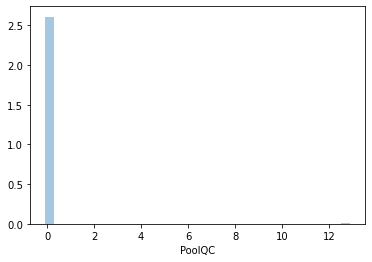

In [88]:
import seaborn as sns
sns.distplot(d_train['PoolQC'])

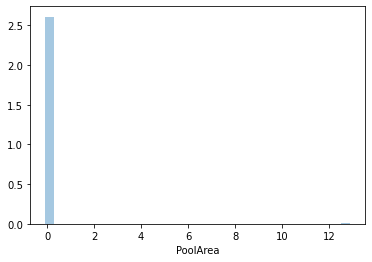

In [89]:
sns.distplot(d_train['PoolArea'])

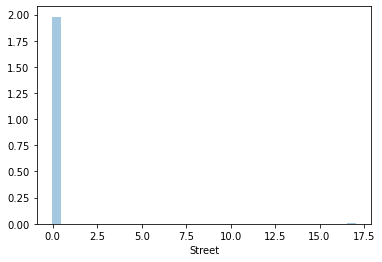

In [90]:
sns.distplot(d_train['Street'])

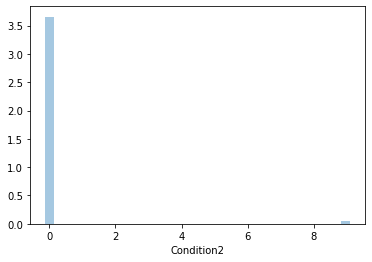

In [94]:
sns.distplot(d_train['Condition2'])

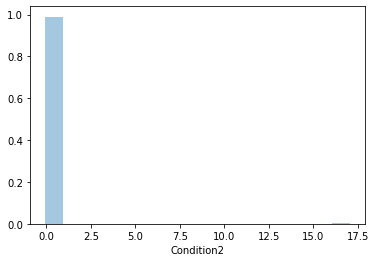

In [207]:
sns.distplot(d_test['Condition2'])

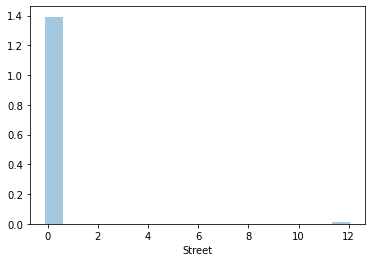

In [208]:
sns.distplot(d_test['Street'])

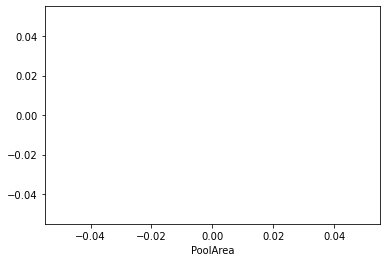

In [209]:
sns.distplot(d_test['PoolArea'])

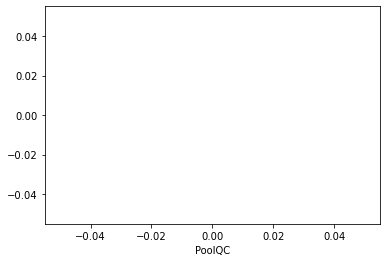

In [210]:
sns.distplot(d_test['PoolQC'])

As per above observation PoolQc and PoolArea are having most of the values as 0 in both the data set but conditon 2 and street has slightly different values when compared to both the data set.

Also PoolQC and Poolarea does not have strong relationship with the target variable so we will delete both the columns

In [211]:
remove= ['PoolQC','PoolArea']

In [212]:
d_train= d_train[d_train.columns.difference(remove)]

In [213]:
d_train.shape

(1168, 77)

In [214]:
x=d_train

In [218]:
removed= ['PoolQC','PoolArea']

In [219]:
d_test= d_test[d_test.columns.difference(removed)]

In [220]:
d_test.shape

(292, 77)

## Finding the best random state

In [116]:
from sklearn.linear_model import LinearRegression
maxAccu=0 
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    predrf=lm.predict(x_test)
    acc=lm.score(x_train,y_train)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Score is",maxAccu," on Random_state",maxRS)

Best Score is 0.7183534246304639  on Random_state 141


## Creating Train Test Split

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=141)

## Regularization

In [128]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [160]:
ls=Lasso(alpha=0.05)
ls.fit(x_train,y_train)
print('Score',ls.score(x_train,y_train))
predm=ls.predict(x_test)
predm=ls.predict(x_test)
print('Mean squared error',mean_squared_error(y_test,predm))
print('Square root of Mean squared error',np.sqrt(mean_squared_error(y_test,predm)))
print('Mean absolute error',mean_absolute_error(y_test,predm))
print('Print R2 score',r2_score(y_test,predm))

Score 0.6440221506966086
Mean squared error 0.23630525846726566
Square root of Mean squared error 0.48611239283448193
Mean absolute error 0.28832302371275376
Print R2 score 0.45671952010064976


In [161]:
ls.coef_

array([ 0.07388523,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.06257299, -0.        ,
       -0.0327886 , -0.        ,  0.        ,  0.        ,  0.08337931,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.10363493,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.03870404,  0.07142885, -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.18106653,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.04017336, -0.        ,  0.        ,  0.        , -0.        ,
        0.0287618 ,  0.        , -0.        , -0.        ,  0.        ,
        0.0490731 ,  0.02014222, -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.15101582, -0.        ,
        0.00137337,  0.        ,  0.        ,  0.02313209,  0.  

In [162]:
rd=Ridge(alpha=0.05)
rd.fit(x_train,y_train)
print('Score',rd.score(x_train,y_train))
pred=rd.predict(x_test)
pred=rd.predict(x_test)
print('Mean squared error',mean_squared_error(y_test,pred))
print('Square root of Mean squared error',np.sqrt(mean_squared_error(y_test,pred)))
print('Mean absolute error',mean_absolute_error(y_test,pred))
print('Print R2 score',r2_score(y_test,pred))

Score 0.718353423060196
Mean squared error 0.2734211606792291
Square root of Mean squared error 0.5228968929714817
Mean absolute error 0.3157602531991635
Print R2 score 0.37138775348485886


In [165]:
rd.coef_

array([ 9.16968838e-02,  1.85173165e-02,  1.74116277e-02, -3.91373165e-02,
       -1.67806987e-03,  9.80918866e-03, -1.96229262e-02,  1.00424426e-02,
        8.44446863e-02, -1.02470219e-02, -6.41319794e-02,  1.11725741e-02,
        1.89403877e-02,  8.05300943e-03,  1.04324629e-01, -2.27193080e-02,
        1.95991683e-03, -2.19393422e-02, -1.15830533e-03, -2.08320656e-03,
       -3.38950814e-03,  9.28322269e-03,  7.77907675e-02,  1.43268740e-02,
        2.21850998e-02,  1.50433666e-02,  1.02228300e-02,  1.30200812e-02,
        2.38047231e-02,  3.11128303e-02, -3.50920864e-03,  4.06333037e-02,
        8.69827257e-02,  1.42017038e-02,  1.41985542e-02, -7.10329033e-03,
       -3.57859520e-02, -7.94001609e-03,  2.00353612e-01,  7.53033850e-04,
        8.68273980e-03,  3.29554741e-02, -1.45522793e-02, -2.22841178e-02,
       -3.30060384e-02,  7.32361286e-02, -1.47970444e-02, -6.02663349e-03,
        2.44742740e-02, -1.49208969e-02,  5.17796239e-02,  1.69004100e-02,
       -1.06620767e-02, -

In [163]:
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.718352604682714


array([ 9.16695011e-02,  1.84879475e-02,  1.73422498e-02, -3.90742983e-02,
       -1.51445613e-03,  9.51117235e-03, -1.94881162e-02,  9.96225758e-03,
        8.44122177e-02, -1.01016793e-02, -6.40959831e-02,  1.09744228e-02,
        1.88927706e-02,  7.99896885e-03,  1.04258154e-01, -2.26696636e-02,
        1.90944952e-03, -2.18870434e-02, -1.12317291e-03, -2.01398692e-03,
       -3.32350072e-03,  9.18096999e-03,  7.78930441e-02,  1.42852520e-02,
        2.21652711e-02,  1.49505946e-02,  1.02100817e-02,  1.29298778e-02,
        2.37448011e-02,  3.10065203e-02, -3.48092506e-03,  4.05945717e-02,
        8.69219689e-02,  1.39129927e-02,  1.41731192e-02, -6.82650095e-03,
       -3.56604897e-02, -7.73576368e-03,  2.00341257e-01,  7.54186698e-04,
        8.60568443e-03,  3.28601639e-02, -1.43140892e-02, -2.21880071e-02,
       -3.29326638e-02,  7.31713702e-02, -1.48334147e-02, -5.90198759e-03,
        2.44325126e-02, -1.48687851e-02,  5.17575813e-02,  1.68292346e-02,
       -1.05444641e-02, -

In [164]:
print('Print R2 score',r2_score(y_test,enrpred))

Print R2 score 0.371803712773366


## Hyper Parameter Tuning

In [135]:
from sklearn.model_selection import GridSearchCV

In [138]:
ElasticNet().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'l1_ratio', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [142]:
parameters= {'alpha':np.arange(2,15),
            'fit_intercept':['intercept_','coef_']}

In [143]:
GCV=GridSearchCV(ElasticNet(),parameters,cv=5)

In [144]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'fit_intercept': ['intercept_', 'coef_']})

In [145]:
GCV.best_params_

{'alpha': 2, 'fit_intercept': 'intercept_'}

In [146]:
GCV_pred=GCV.best_estimator_.predict(x_test)

## Saving the best model

In [148]:
import joblib
joblib.dump(GCV.best_estimator_,"House Price.obj")

['House Price.obj']

## Predicting for Test Data

In [149]:
mod=joblib.load('House Price.obj')

In [154]:
# predicted_values=mod.predict('d_test')

In [ ]:
# predicted_values.to_csv('Results.csv')